## Import necessary libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Let's start with a very basic synthetic dataset sine wave.

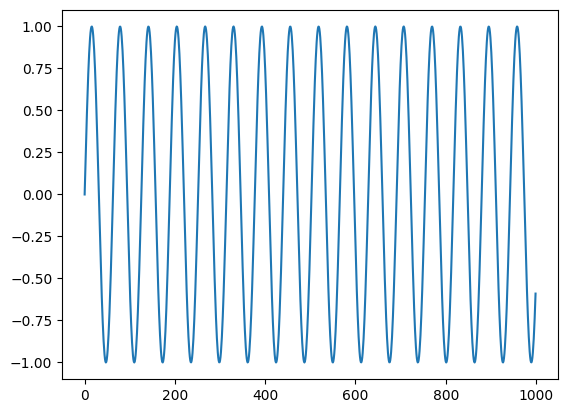

In [ ]:
# Make the data
N = 1000
series = np.sin(0.1*np.arange(N))
# We've created a sine wave with no noise


# Plot the data
plt.plot(series)
plt.show()

In [ ]:
# Build the dataset
T = 10

# We want to see if we can use past 10 data to predict the new data
# Hence, T = 10

X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)

print(f"Shape of X : {X.shape} & Shape of Y : {Y.shape}")

Shape of X : (990, 10) & Shape of Y : (990, 1)


In [ ]:
### Try AR linear model
model = nn.Linear(T, 1)

In [ ]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [ ]:
# Make train and test set

X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

We are not doing random splits because a forecasting model has to predict the future. So, training is only done in the first half and testing on the half.

In [ ]:
## Training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs = 200):

  # Stuffs to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs} <br> Train Loss : {loss.item():4f} <br> Test Loss : {test_loss.item():4f}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = full_gd(model,
                                  criterion,
                                  optimizer,
                                  X_train,
                                  y_train,
                                  X_test,
                                  y_test)

Epoch 5/200 <br> Train Loss : 0.559723 <br> Test Loss : 0.443096
Epoch 10/200 <br> Train Loss : 0.134513 <br> Test Loss : 0.203127
Epoch 15/200 <br> Train Loss : 0.016107 <br> Test Loss : 0.006904
Epoch 20/200 <br> Train Loss : 0.087106 <br> Test Loss : 0.049489
Epoch 25/200 <br> Train Loss : 0.038676 <br> Test Loss : 0.051405
Epoch 30/200 <br> Train Loss : 0.008111 <br> Test Loss : 0.012380
Epoch 35/200 <br> Train Loss : 0.012847 <br> Test Loss : 0.004442
Epoch 40/200 <br> Train Loss : 0.012807 <br> Test Loss : 0.009112
Epoch 45/200 <br> Train Loss : 0.004031 <br> Test Loss : 0.006407
Epoch 50/200 <br> Train Loss : 0.000879 <br> Test Loss : 0.002152
Epoch 55/200 <br> Train Loss : 0.000991 <br> Test Loss : 0.000573
Epoch 60/200 <br> Train Loss : 0.001185 <br> Test Loss : 0.000309
Epoch 65/200 <br> Train Loss : 0.001007 <br> Test Loss : 0.000573
Epoch 70/200 <br> Train Loss : 0.000575 <br> Test Loss : 0.000530
Epoch 75/200 <br> Train Loss : 0.000304 <br> Test Loss : 0.000369
Epoch 80/20

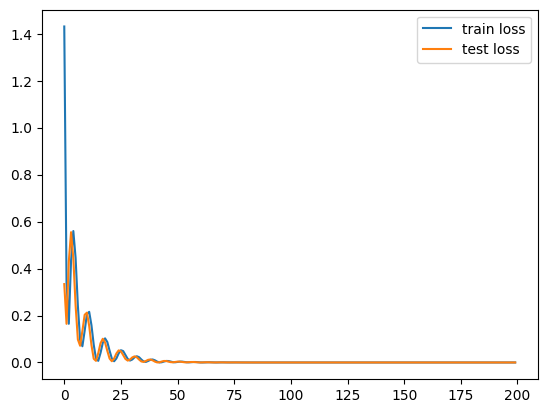

In [ ]:
# Plot train and test loss per iteration
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [ ]:
# "Wrong forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of firts validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1,-1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

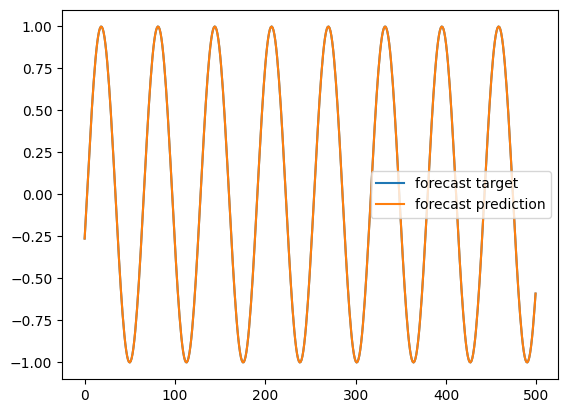

In [ ]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [ ]:
# "correct forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1,-1)
  p = model(input_)
  #[0,0].item() # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

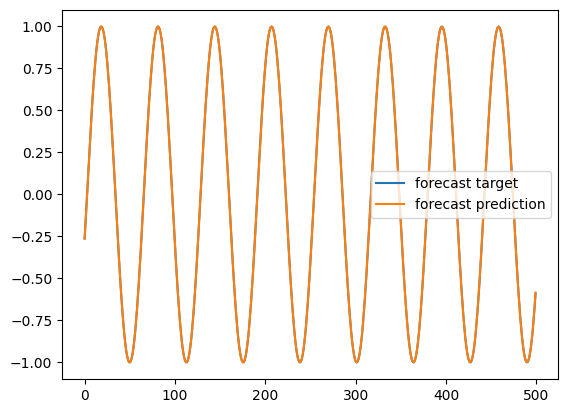

In [ ]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


Everything seems perfect because our dataset didnot have any noise.<br>
Let's look at what happens if we add some noise.

### Addding Noise

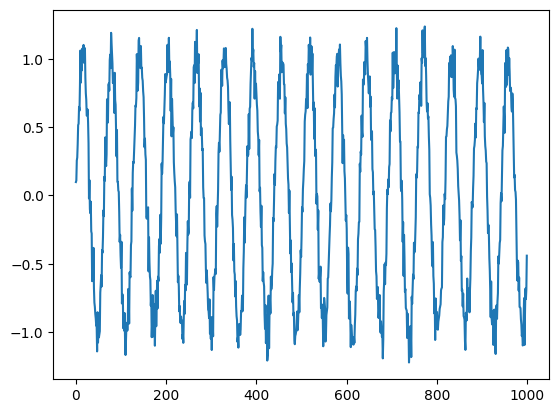

In [ ]:
# Make the data
N = 1000
series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1
# We've created a sine wave with no noise


# Plot the data
plt.plot(series)
plt.show()

In [ ]:
# Build the dataset
T = 10

# We want to see if we can use past 10 data to predict the new data
# Hence, T = 10

X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)

print(f"Shape of X : {X.shape} & Shape of Y : {Y.shape}")

Shape of X : (990, 10) & Shape of Y : (990, 1)


In [ ]:
### Try AR linear model
model = nn.Linear(T, 1)

In [ ]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [ ]:
# Make train and test set

X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

We are not doing random splits because a forecasting model has to predict the future. So, training is only done in the first half and testing on the half.

In [ ]:
## Training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs = 200):

  # Stuffs to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs} <br> Train Loss : {loss.item():4f} <br> Test Loss : {test_loss.item():4f}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = full_gd(model,
                                  criterion,
                                  optimizer,
                                  X_train,
                                  y_train,
                                  X_test,
                                  y_test)

Epoch 5/200 <br> Train Loss : 0.078463 <br> Test Loss : 0.076255
Epoch 10/200 <br> Train Loss : 0.017738 <br> Test Loss : 0.038286
Epoch 15/200 <br> Train Loss : 0.031198 <br> Test Loss : 0.044684
Epoch 20/200 <br> Train Loss : 0.032060 <br> Test Loss : 0.035317
Epoch 25/200 <br> Train Loss : 0.020126 <br> Test Loss : 0.021270
Epoch 30/200 <br> Train Loss : 0.017393 <br> Test Loss : 0.020085
Epoch 35/200 <br> Train Loss : 0.019520 <br> Test Loss : 0.021456
Epoch 40/200 <br> Train Loss : 0.018092 <br> Test Loss : 0.019459
Epoch 45/200 <br> Train Loss : 0.016752 <br> Test Loss : 0.018049
Epoch 50/200 <br> Train Loss : 0.017260 <br> Test Loss : 0.018126
Epoch 55/200 <br> Train Loss : 0.016956 <br> Test Loss : 0.017155
Epoch 60/200 <br> Train Loss : 0.016138 <br> Test Loss : 0.016415
Epoch 65/200 <br> Train Loss : 0.015813 <br> Test Loss : 0.016371
Epoch 70/200 <br> Train Loss : 0.015621 <br> Test Loss : 0.016291
Epoch 75/200 <br> Train Loss : 0.015471 <br> Test Loss : 0.016177
Epoch 80/20

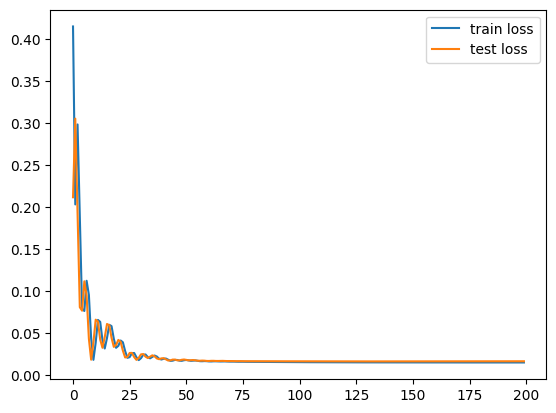

In [ ]:
# Plot train and test loss per iteration
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [ ]:
# "Wrong forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of firts validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1,-1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

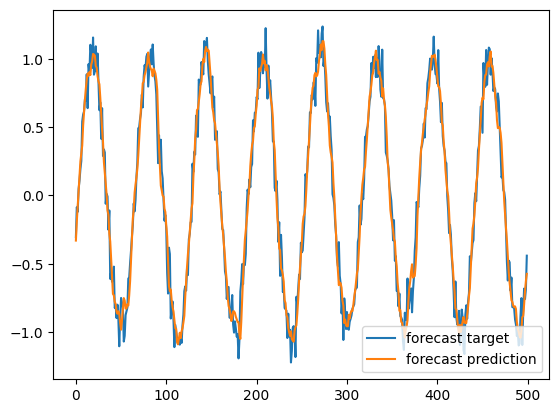

In [ ]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [ ]:
# "correct forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1,-1)
  p = model(input_)
  #[0,0].item() # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

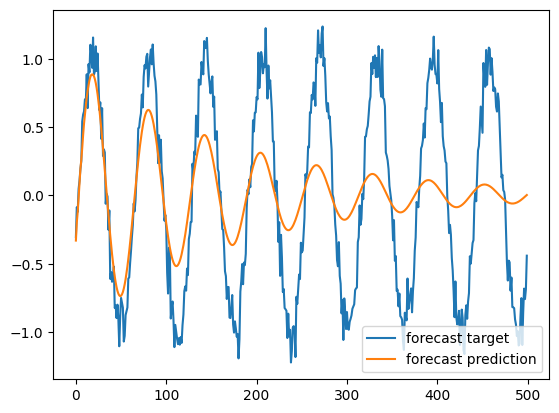

In [ ]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


Now, we can see the models actual prediction. However, model learned the pattern/trend is periodic.